In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table('WEOOct2020all.tsv')

In [3]:
df.head(3)


,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After,Unnamed: 56
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,270.216","1,319.902","1,253.906","1,304.063","1,363.060","1,424.397","1,481.497","1,540.937",2019.0,NaN
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,1.189,3.912,-5.000,4.000,4.524,4.500,4.009,4.012,2019.0,NaN
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,327.690","1,469.596","1,465.922","1,597.738","1,741.832","1,893.023","2,047.665","2,215.013",2019.0,NaN


In [4]:
df.shape

(8776, 57)

In [5]:
per_capita_df = df[df['Subject Descriptor']=="Gross domestic product per capita, constant prices"]

In [6]:
is_USD = df['Units'] == 'Purchasing power parity; 2017 international dollar'

In [7]:
per_capita_df['Units'].unique()

array(['National currency',
       'Purchasing power parity; 2017 international dollar'], dtype=object)

In [54]:
USD_df = per_capita_df[is_USD]

<ipython-input-54-88457d98e882>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  USD_df = per_capita_df[is_USD]


In [55]:
USD_df.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After,Unnamed: 56
7,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,...,"2,078.476","2,111.253","1,961.102","1,993.691","2,037.035","2,080.842","2,115.599","2,151.006",2019.0,NaN
52,914,ALB,NGDPRPPPPC,Albania,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...","5,557.570",...,"13,654.821","13,944.393","12,915.116","13,724.042","14,545.728","15,197.035","15,747.620","16,313.618",2018.0,NaN
97,612,DZA,NGDPRPPPPC,Algeria,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...","9,029.291",...,"11,385.311","11,252.807","10,445.131","10,584.812","10,671.724","10,619.484","10,562.476","10,504.567",2019.0,NaN
142,614,AGO,NGDPRPPPPC,Angola,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...","3,248.269",...,"7,363.118","7,084.321","6,602.074","6,616.756","6,615.727","6,675.457","6,725.446","6,718.419",2017.0,NaN
187,311,ATG,NGDPRPPPPC,Antigua and Barbuda,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...","8,035.578",...,"21,267.016","21,652.158","17,648.967","18,211.195","19,935.323","21,276.834","21,826.092","22,328.332",2011.0,NaN


In [56]:
USD_df.shape

(195, 57)

In [57]:
USD_df['Country'].is_unique

True

In [58]:
for i in range(1980, 2026):
    USD_df[str(i)] = USD_df[str(i)].str.replace(',', '')
    USD_df[str(i)] = pd.to_numeric(USD_df[str(i)], errors='coerce')

<ipython-input-58-9e191d16763e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USD_df[str(i)] = USD_df[str(i)].str.replace(',', '')
<ipython-input-58-9e191d16763e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USD_df[str(i)] = pd.to_numeric(USD_df[str(i)], errors='coerce')


In [59]:
USD_df.dtypes

WEO Country Code                  object
ISO                               object
WEO Subject Code                  object
Country                           object
Subject Descriptor                object
Subject Notes                     object
Units                             object
Scale                             object
Country/Series-specific Notes     object
1980                             float64
1981                             float64
1982                             float64
1983                             float64
1984                             float64
1985                             float64
1986                             float64
1987                             float64
1988                             float64
1989                             float64
1990                             float64
1991                             float64
1992                             float64
1993                             float64
1994                             float64
1995            

In [60]:
USD_df = USD_df.drop(['WEO Country Code', 'ISO', 'WEO Subject Code', 
                      'Subject Descriptor', 'Subject Notes', 'Units', 
                      'Scale', 'Country/Series-specific Notes', 'Estimates Start After', 'Unnamed: 56'], axis=1)

In [61]:
USD_df = USD_df.set_index('Country')

In [62]:
USD_df = USD_df.T

In [69]:
USD_df.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1980,NaN,5557.570,9029.291,3248.269,8035.578,18295.433,NaN,NaN,26461.677,31380.125,...,31984.153,10190.502,NaN,2433.381,20271.892,1437.143,NaN,NaN,2957.214,NaN
1981,NaN,5757.860,9019.899,3023.625,8408.028,16941.519,NaN,NaN,27118.791,31285.924,...,32468.616,10313.255,NaN,2454.480,19416.092,1489.394,NaN,NaN,3052.876,NaN
1982,NaN,5800.944,9298.589,2945.697,8498.438,16135.868,NaN,NaN,26692.594,31842.810,...,31579.527,9289.760,NaN,2421.682,19354.475,1579.654,NaN,NaN,2871.765,NaN
1983,NaN,5741.680,9489.245,2991.109,9085.003,16504.373,NaN,NaN,26232.289,32832.486,...,32728.292,8927.488,NaN,2435.173,16967.969,1660.202,NaN,NaN,2752.526,NaN
1984,NaN,5734.583,9708.785,3088.912,10172.400,16552.433,NaN,NaN,27552.145,32937.871,...,34790.841,8773.848,NaN,2586.283,17366.774,1765.816,NaN,NaN,2624.524,NaN


In [78]:
USD_df.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

In [85]:
for country in USD_df.columns:
    plt.figure(figsize=(16,9))
    plt.title('GPD per catipa purchasing power in USD')
    plt.xlabel('Years')
    plt.ylabel('Dollars')
    USD_df[country].plot(legend=True)
    plt.savefig(f'Graphs/{country}-GDP_per_capita_purchashing_power_in_USD.png')
    plt.close()

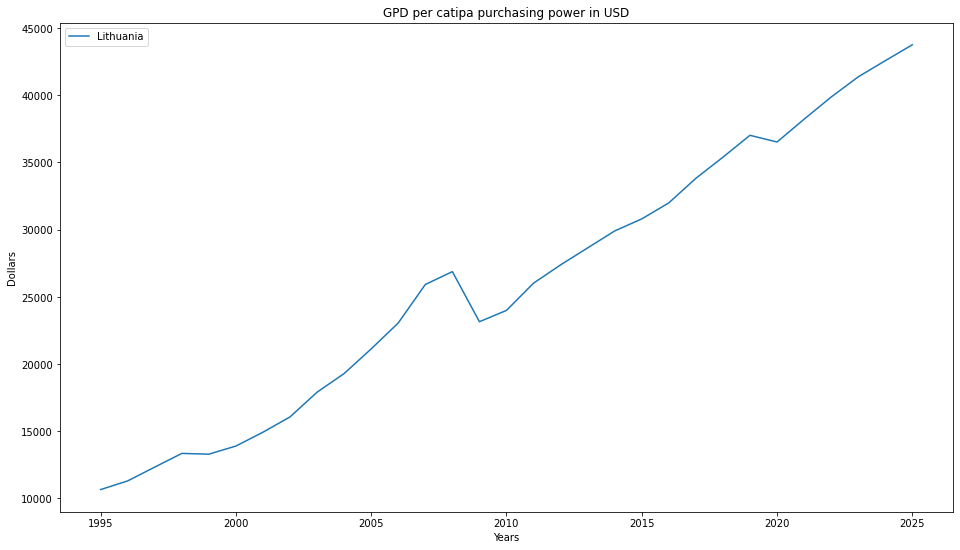

In [84]:
plt.figure(figsize=(16,9))
plt.title('GPD per catipa purchasing power in USD')
plt.xlabel('Years')
plt.ylabel('Dollars')

USD_df['Lithuania'].plot(legend=True)
plt.show()